In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib widget
import os
import sys
import importlib
import glob
from scipy.signal import find_peaks


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import bode_tools
import DREAM_colors as dc
import math_functions as mf
import BodeClass_PSI as bc
import ExperimentClass as ec

importlib.reload(tools)
importlib.reload(mf)
importlib.reload(bc)
importlib.reload(ec)
importlib.reload(dc)


<module 'DREAM_colors' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\DREAM_colors.py'>

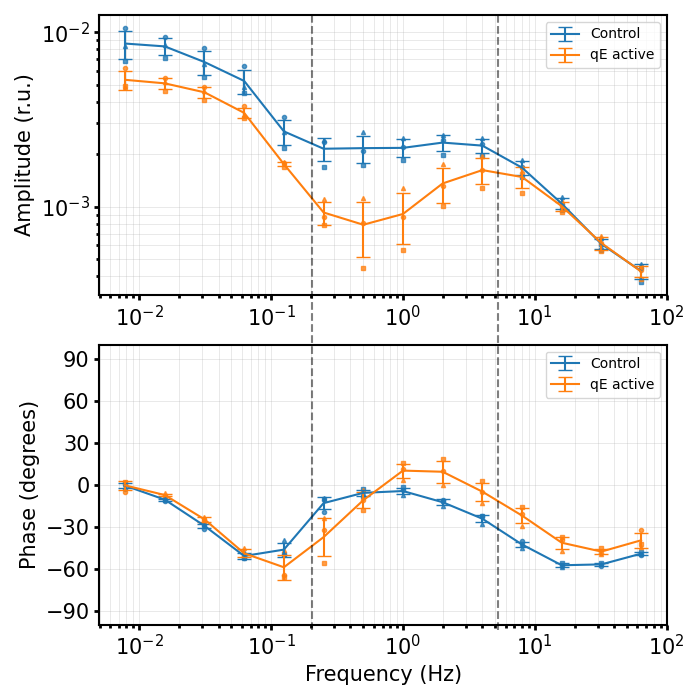

In [2]:
### Replicates fundamental frequency ###

import matplotlib.lines as mlines


names = ["20240723_bode_stt71A6_control_1", "20240723_bode_stt71A6_qE_act_1"] + ["20240724_bode_stt71A6_control_2", "20240724_bode_stt71A6_qE_act_2"] + ["20240725_bode_stt71A6_control_3", "20240725_bode_stt71A6_qE_act_3"]
norm_Fmax = [0.9865909090909092, 0.8594366666666665] + [0.8250509090909091, 0.7004727272727275] + [1.3158090909090907, 1.1984242424242426]
A_input = [10, 15.5] + [10, 18] + [10, 14]

ref_phase = [-18.63746965,  -8.24066821,  -5.80866103,  -5.39514713, -3.89644455,  -3.70165093, -21.19220846, -11.69197657, -7.08698514,  -3.25738282,   5.83062099,   3.30577614, -6.45168624,  -6.61327604]

results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))
 
fig, ax = plt.subplots(2, 1, figsize = (7, 7))

line = 0.5
marker = 3
alpha = 0.75
fmt = ['o', 'o', 's', 's', '^', '^']

Amplitudes_ctr = []
Phases_ctr = []
Amplitudes_act = []
Phases_act = []

control = [0, 2, 4]
activated = [1, 3, 5]

for i, result in enumerate(results):
    harmonics = result
    
    if i in control:
        ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), fmt[i], linewidth = line, markersize = marker, color = "C0", alpha = alpha)
        ax[1].semilogx(harmonics['f_input'], harmonics['P_0'] - 180 - ref_phase, fmt[i], linewidth = line, markersize = marker, color = "C0", alpha = alpha)
        Amplitudes_ctr.append(harmonics['A_0']/(norm_Fmax[i] * A_input[i]))
        Phases_ctr.append(harmonics['P_0'] - 180 - ref_phase)
    if i in activated:
        ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), fmt[i], linewidth = line, markersize = marker, color = "C1", alpha = alpha)
        ax[1].semilogx(harmonics['f_input'], harmonics['P_0'] - 180 - ref_phase, fmt[i], linewidth = line, markersize = marker, color = "C1", alpha = alpha)
        Amplitudes_act.append(harmonics['A_0']/(norm_Fmax[i] * A_input[i]))
        Phases_act.append(harmonics['P_0'] - 180 - ref_phase)


Amplitudes_ctr = np.array(Amplitudes_ctr)
Phases_ctr = np.array(Phases_ctr)
Amplitudes_act = np.array(Amplitudes_act)
Phases_act = np.array(Phases_act)

mean_Amplitudes_ctr = np.mean(Amplitudes_ctr, axis = 0)
std_Amplitudes_ctr = np.std(Amplitudes_ctr, axis = 0)

mean_Phases_ctr = np.mean(Phases_ctr, axis = 0)
std_Phases_ctr = np.std(Phases_ctr, axis = 0)

mean_Amplitudes_act = np.mean(Amplitudes_act, axis = 0)
std_Amplitudes_act = np.std(Amplitudes_act, axis = 0)

mean_Phases_act = np.mean(Phases_act, axis = 0)
std_Phases_act = np.std(Phases_act, axis = 0)

ax[0].errorbar(harmonics['f_input'], mean_Amplitudes_ctr, yerr = std_Amplitudes_ctr, label = "Control", capsize = 5)
ax[0].errorbar(harmonics['f_input'], mean_Amplitudes_act, yerr = std_Amplitudes_act, label = "qE active", capsize = 5)

ax[1].errorbar(harmonics['f_input'], mean_Phases_ctr, yerr = std_Phases_ctr, label = "Control", capsize = 5)
ax[1].errorbar(harmonics['f_input'], mean_Phases_act, yerr = std_Phases_act, label = "qE active", capsize = 5)


ax[0].set_xlabel("Frequency (Hz)")

ax[0].grid(which = 'both')
ax[1].set_xlabel("Frequency (Hz)")

ax[1].grid(which = 'both')

ax[1].set_ylim(-100, 100)
ax[1].set_yticks(np.arange(-90, 90 + 30, 30))

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].set_xlabel("")  

ax[0].legend()
ax[1].legend()

# Convert x = 0.2 from data coordinates to figure coordinates
for x_data in [0.3, 9]:
    x_fig = ax[0].transData.transform((x_data, 0))[0]
    x_fig = fig.transFigure.inverted().transform((x_fig, 0))[0]

    # Add a vertical line at the converted x-coordinate
    line = mlines.Line2D([x_fig, x_fig], [0.1, 0.98], transform=fig.transFigure, color='k', linestyle='--', alpha = 0.5)
    fig.add_artist(line) 


fig.tight_layout()
fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/replicates_bode_avg_point_regions.png", dpi=300)



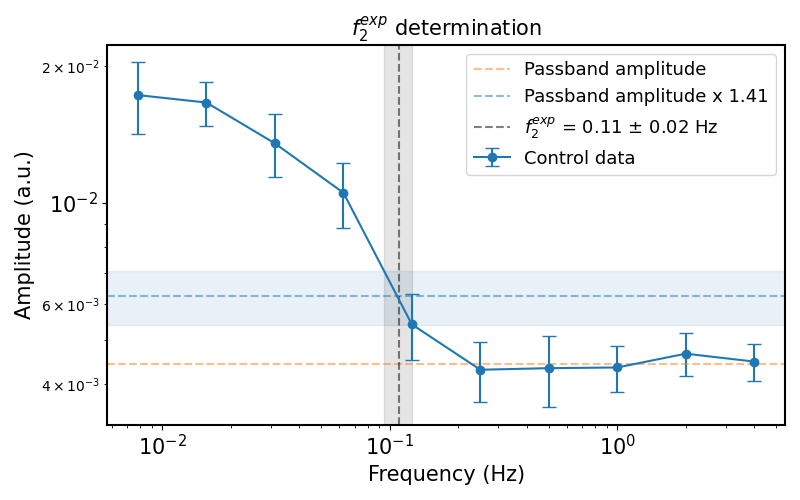

In [3]:
fig, ax = plt.subplots(figsize = (8, 5))
ref = Amplitudes_ctr[:,4:9].mean()*2
ref_err = Amplitudes_ctr[:,4:9].std()*2

ax.errorbar(harmonics['f_input'][4:], 2*mean_Amplitudes_ctr[4:], yerr = 2*std_Amplitudes_ctr[4:], fmt = 'o-', label = "Control data", capsize = 5)
ax.set_xscale("log")
ax.set_yscale("log")

xlim = ax.get_xlim()

ax.axhline(ref, color = "C1", alpha = 0.5, linestyle = '--', label = "Passband amplitude")

ax.axhline(ref*1.41, color = "C0", linestyle = '--', alpha = 0.5, label = "Passband amplitude x 1.41")
ax.fill_between(xlim, ref*1.41 - ref_err*1.41, ref*1.41 + ref_err*1.41, color = "C0", alpha = 0.1)

cut_low = 0.094415
cut_high = 0.125561
cut_avg = (cut_low + cut_high)/2
err = cut_avg - cut_low

ax.axvline(cut_avg, color = "k", linestyle = '--', alpha = 0.5, label = f"$f_2^{{exp}}$ = {cut_avg:.2f} ± {err:.2f} Hz")

ylim = ax.get_ylim()

ax.fill_betweenx(ylim, cut_low, cut_high, color = "k", alpha = 0.1)


ax.set_ylim(ylim)
ax.set_xlim(xlim)


ax.legend(loc = "lower left")

ax = tools.poster_axes(ax, title = "$f_2^{exp}$ determination", xlabel = "Frequency (Hz)", ylabel = "Amplitude (a.u.)", legendfontsize=13)

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/cut_off_2.png", dpi=300)

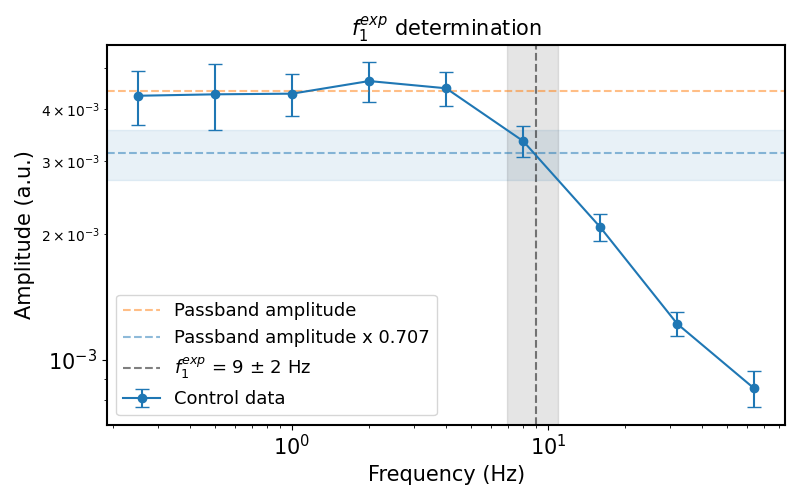

In [4]:
fig, ax = plt.subplots(figsize = (8, 5))
ref = Amplitudes_ctr[:,4:9].mean()*2
ref_err = Amplitudes_ctr[:,4:9].std()*2

ax.errorbar(harmonics['f_input'][0:9], 2*mean_Amplitudes_ctr[0:9], yerr = 2*std_Amplitudes_ctr[0:9], fmt = 'o-', label = "Control data", capsize = 5)
ax.set_xscale("log")
ax.set_yscale("log")

xlim = ax.get_xlim()

ax.axhline(ref, color = "C1", alpha = 0.5, linestyle = '--', label = "Passband amplitude")

ax.axhline(ref*0.707, color = "C0", linestyle = '--', alpha = 0.5, label = "Passband amplitude x 0.707")
ax.fill_between(xlim, ref*0.707 - ref_err*0.707, ref*0.707 + ref_err*0.707, color = "C0", alpha = 0.1)

cut_low = 6.937
cut_high = 10.9575
cut_avg = (cut_low + cut_high)/2
err = cut_avg - cut_low

ax.axvline(cut_avg, color = "k", linestyle = '--', alpha = 0.5, label = f"$f_1^{{exp}}$ = {cut_avg:.0f} ± {err:.0f} Hz")

ylim = ax.get_ylim()

ax.fill_betweenx(ylim, cut_low, cut_high, color = "k", alpha = 0.1)


ax.set_ylim(ylim)
ax.set_xlim(xlim)


ax.legend(loc = "lower left")

ax = tools.poster_axes(ax, title = "$f_1^{exp}$ determination", xlabel = "Frequency (Hz)", ylabel = "Amplitude (a.u.)", legendfontsize=13)

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/cut_off_1.png", dpi=300)

In [5]:
ref = Amplitudes_ctr[:,4:9].mean()
ref_err = Amplitudes_ctr[:,4:9].std()

c:\Users\Orlando\anaconda3\envs\PhD_environment\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\Orlando\Desktop\DREAM_repo\tools.py:104: RuntimeWarning: divide by zero encountered in double_scalars
  mse = np.sum(residuals**2) / (n - (2 if fixed_slope is None else 1))


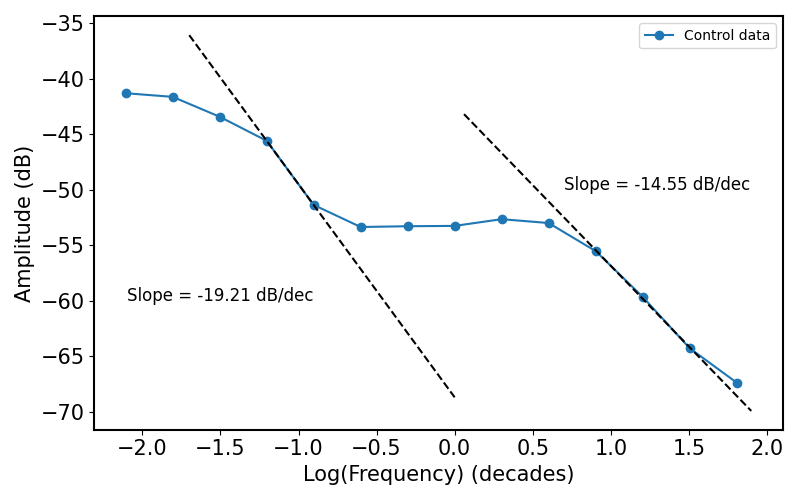

In [6]:
fig, ax = plt.subplots(figsize = (8, 5))
decades = np.log10(harmonics['f_input'].values)
decibels = 20*np.log10(mean_Amplitudes_ctr)

ax.plot(decades, decibels, 'o-', label = "Control data")

xdata = decades[1:4]
ydata = decibels[1:4]

popt, xfit, yfit, r_squared, error_slope, error_intercept = tools.lin_fit(xdata, ydata, 0.06, 1.9, 10, stats=True)
ax.plot(xfit, yfit, 'k--')
ax.text(0.7, -50, f"Slope = {popt[0]:.2f} dB/dec", fontsize = 12)

xdata = decades[9:11]
ydata = decibels[9:11]

popt, xfit, yfit, r_squared, error_slope, error_intercept = tools.lin_fit(xdata, ydata, -1.7, 0, 10, stats=True)
ax.plot(xfit, yfit, 'k--')
ax.text(-2.1, -60, f"Slope = {popt[0]:.2f} dB/dec", fontsize = 12)


ax = tools.poster_axes(ax, title = "", xlabel = "Log(Frequency) (decades)", ylabel = "Amplitude (dB)", legendfontsize=13)    

ax.legend()

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/slopes.png", dpi=300)

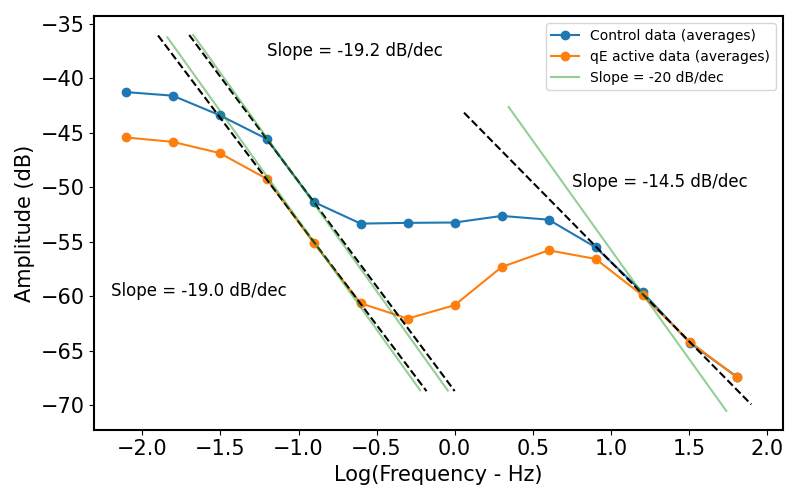

In [15]:
importlib.reload(tools)
fig, ax = plt.subplots(figsize = (8, 5))
decades = np.log10(harmonics['f_input'].values)
decibels = 20*np.log10(mean_Amplitudes_ctr)
decibels_qE = 20*np.log10(mean_Amplitudes_act)

ax.plot(decades, decibels, 'o-', label = "Control data (averages)")
ax.plot(decades, decibels_qE, 'o-', label = "qE active data (averages)")

xdata = decades[1:4]
ydata = decibels[1:4]

popt, xfit, yfit, r_squared, error_slope, error_intercept = tools.lin_fit(xdata, ydata, 0.06, 1.9, 10, stats=True)
ax.plot(xfit, yfit, 'k--')
ax.text(0.75, -50, f"Slope = {popt[0]:.1f} dB/dec", fontsize = 12)

popt, xfit, yfit, r_squared, error_slope, error_intercept  = tools.lin_fit(xdata, ydata, 0.346, 1.74, 10, stats=True, fixed_slope=-20)
ax.plot(xfit, yfit, 'C2-', alpha = 0.5, label = "Slope = -20 dB/dec")

xdata = decades[9:11]
ydata = decibels[9:11]

popt, xfit, yfit, r_squared, error_slope, error_intercept = tools.lin_fit(xdata, ydata, -1.7, 0, 10, stats=True)
ax.plot(xfit, yfit, 'k--')
ax.text(-1.2, -38, f"Slope = {popt[0]:.1f} dB/dec", fontsize = 12)

popt, xfit, yfit, r_squared, error_slope, error_intercept = tools.lin_fit(xdata, ydata, -1.675, -0.044, 10, stats=True, fixed_slope=-20)
ax.plot(xfit, yfit, 'C2-', alpha = 0.5)


xdata = decades[8:11]
ydata = decibels_qE[8:11]

popt, xfit, yfit, r_squared, error_slope, error_intercept = tools.lin_fit(xdata, ydata, -1.9, -0.18, 10, stats=True)
ax.plot(xfit, yfit, 'k--')
ax.text(-2.2, -60, f"Slope = {popt[0]:.1f} dB/dec", fontsize = 12)

popt, xfit, yfit, r_squared, error_slope, error_intercept = tools.lin_fit(xdata, ydata, -1.84, -0.221, 10, stats=True, fixed_slope=-20)
ax.plot(xfit, yfit, 'C2-', alpha = 0.5)


ax = tools.poster_axes(ax, title = "", xlabel = "Log(Frequency - Hz)", ylabel = "Amplitude (dB)", legendfontsize=13)    

ax.legend()

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/slopes.png", dpi=300)

In [8]:
ref_err*0.707

0.0002120263540260069

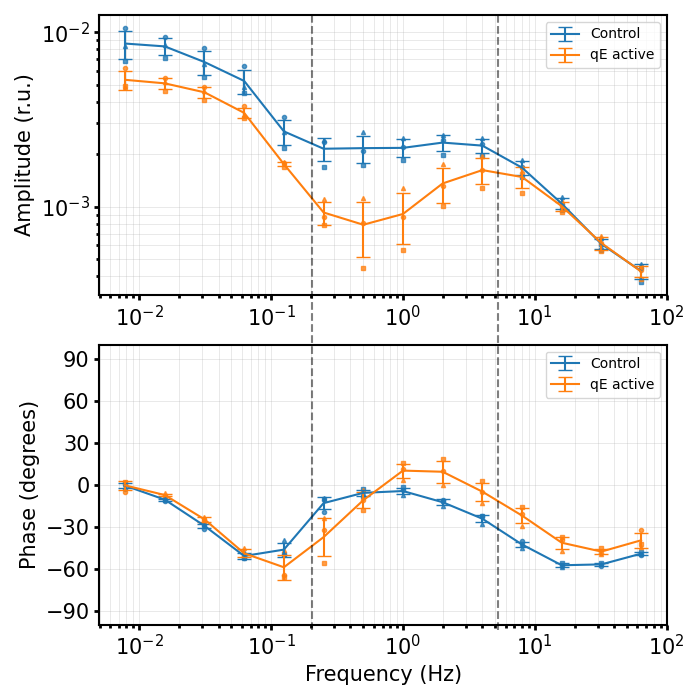

In [13]:
### Replicates fundamental frequency ###

import matplotlib.lines as mlines


names = ["20240723_bode_stt71A6_control_1", "20240723_bode_stt71A6_qE_act_1"] + ["20240724_bode_stt71A6_control_2", "20240724_bode_stt71A6_qE_act_2"] + ["20240725_bode_stt71A6_control_3", "20240725_bode_stt71A6_qE_act_3"]
norm_Fmax = [0.9865909090909092, 0.8594366666666665] + [0.8250509090909091, 0.7004727272727275] + [1.3158090909090907, 1.1984242424242426]
A_input = [10, 15.5] + [10, 18] + [10, 14]

ref_phase = [-18.63746965,  -8.24066821,  -5.80866103,  -5.39514713, -3.89644455,  -3.70165093, -21.19220846, -11.69197657, -7.08698514,  -3.25738282,   5.83062099,   3.30577614, -6.45168624,  -6.61327604]

results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))
 
fig, ax = plt.subplots(2, 1, figsize = (7, 7))

line = 0.5
marker = 3
alpha = 0.75
fmt = ['o', 'o', 's', 's', '^', '^']

Amplitudes_ctr = []
Phases_ctr = []
Amplitudes_act = []
Phases_act = []

control = [0, 2, 4]
activated = [1, 3, 5]

for i, result in enumerate(results):
    harmonics = result
    
    if i in control:
        ax[0].semilogx(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), fmt[i], linewidth = line, markersize = marker, color = "C0", alpha = alpha)
        ax[1].semilogx(harmonics['f_input'], harmonics['P_0'] - 180 - ref_phase, fmt[i], linewidth = line, markersize = marker, color = "C0", alpha = alpha)
        Amplitudes_ctr.append(harmonics['A_0']/(norm_Fmax[i] * A_input[i]))
        Phases_ctr.append(harmonics['P_0'] - 180 - ref_phase)
    if i in activated:
        ax[0].semilogx(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), fmt[i], linewidth = line, markersize = marker, color = "C1", alpha = alpha)
        ax[1].semilogx(harmonics['f_input'], harmonics['P_0'] - 180 - ref_phase, fmt[i], linewidth = line, markersize = marker, color = "C1", alpha = alpha)
        Amplitudes_act.append(harmonics['A_0']/(norm_Fmax[i] * A_input[i]))
        Phases_act.append(harmonics['P_0'] - 180 - ref_phase)


Amplitudes_ctr = np.array(Amplitudes_ctr)
Phases_ctr = np.array(Phases_ctr)
Amplitudes_act = np.array(Amplitudes_act)
Phases_act = np.array(Phases_act)

mean_Amplitudes_ctr = np.mean(Amplitudes_ctr, axis = 0)
std_Amplitudes_ctr = np.std(Amplitudes_ctr, axis = 0)

mean_Phases_ctr = np.mean(Phases_ctr, axis = 0)
std_Phases_ctr = np.std(Phases_ctr, axis = 0)

mean_Amplitudes_act = np.mean(Amplitudes_act, axis = 0)
std_Amplitudes_act = np.std(Amplitudes_act, axis = 0)

mean_Phases_act = np.mean(Phases_act, axis = 0)
std_Phases_act = np.std(Phases_act, axis = 0)

ax[0].errorbar(harmonics['f_input'], mean_Amplitudes_ctr, yerr = std_Amplitudes_ctr, label = "Control", capsize = 5)
ax[0].errorbar(harmonics['f_input'], mean_Amplitudes_act, yerr = std_Amplitudes_act, label = "qE active", capsize = 5)

ax[1].errorbar(harmonics['f_input'], mean_Phases_ctr, yerr = std_Phases_ctr, label = "Control", capsize = 5)
ax[1].errorbar(harmonics['f_input'], mean_Phases_act, yerr = std_Phases_act, label = "qE active", capsize = 5)


ax[0].set_xlabel("Frequency (Hz)")

ax[0].grid(which = 'both')
ax[1].set_xlabel("Frequency (Hz)")

ax[1].grid(which = 'both')

ax[1].set_ylim(-100, 100)
ax[1].set_yticks(np.arange(-90, 90 + 30, 30))

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].set_xlabel("")  

ax[0].legend()
ax[1].legend()

# Convert x = 0.2 from data coordinates to figure coordinates
for x_data in [0.3, 9]:
    x_fig = ax[0].transData.transform((x_data, 0))[0]
    x_fig = fig.transFigure.inverted().transform((x_fig, 0))[0]

    # Add a vertical line at the converted x-coordinate
    line = mlines.Line2D([x_fig, x_fig], [0.1, 0.98], transform=fig.transFigure, color='k', linestyle='--', alpha = 0.5)
    fig.add_artist(line) 


fig.tight_layout()
fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/replicates_bode_avg_point_regions.png", dpi=300)



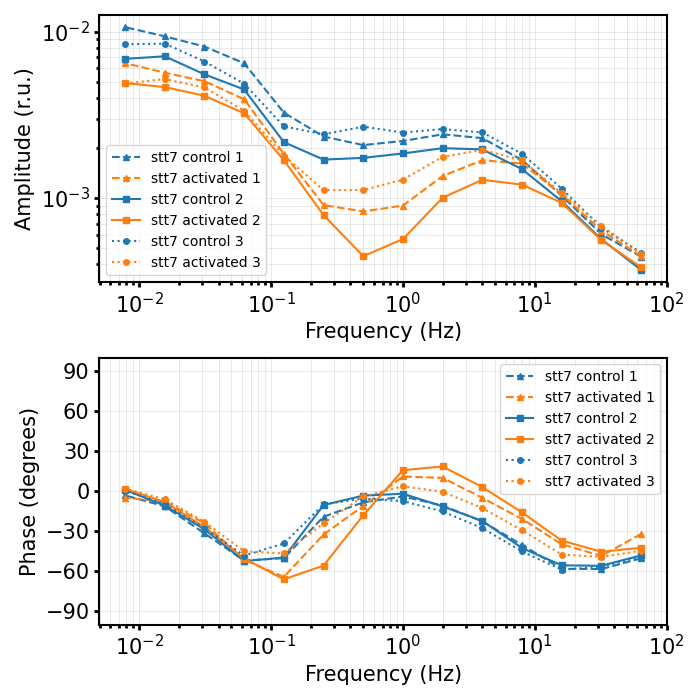

In [10]:
### Replicates fundamental frequency ###

names = ["20240723_bode_stt71A6_control_1", "20240723_bode_stt71A6_qE_act_1"] + ["20240724_bode_stt71A6_control_2", "20240724_bode_stt71A6_qE_act_2"] + ["20240725_bode_stt71A6_control_3", "20240725_bode_stt71A6_qE_act_3"]
norm_Fmax = [0.9865909090909092, 0.8594366666666665] + [0.8250509090909091, 0.7004727272727275] + [1.3158090909090907, 1.1984242424242426]
A_input = [10, 15] + [10, 18] + [10, 14]

ref_phase = [-18.63746965,  -8.24066821,  -5.80866103,  -5.39514713, -3.89644455,  -3.70165093, -21.19220846, -11.69197657, -7.08698514,  -3.25738282,   5.83062099,   3.30577614, -6.45168624,  -6.61327604]


results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))
 
fig, ax = plt.subplots(2, 1, figsize = (7, 7))
labels =  ["stt7 control 1", "stt7 activated 1" ] + ["stt7 control 2", "stt7 activated 2" ] + ["stt7 control 3", "stt7 activated 3"]
fmt = ['--^', '--^', '-s', '-s', ':o', ':o']
color = ['C0', 'C1', 'C0', "C1", 'C0', 'C1']
line = 1.5
marker = 4

for i, result in enumerate(results):
    
    harmonics = result

    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])

    phase = harmonics['P_0'] - 180 - ref_phase

    ax[1].semilogx(harmonics['f_input'], phase, fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])


ax[0].set_xlabel("Frequency (Hz)")

ax[0].grid(which = 'both')
ax[1].set_xlabel("Frequency (Hz)")

ax[1].grid(which = 'both')

ax[1].set_ylim(-100, 100)
ax[1].set_yticks(np.arange(-90, 90 + 30, 30))

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend()
ax[1].legend()

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/replicates_bode_curves.png", dpi=300)



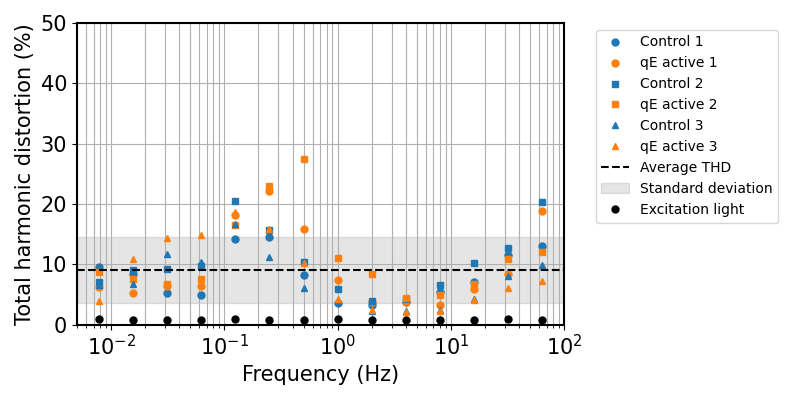

In [11]:
### Replicates Harmonic distortion ###

import matplotlib.lines as mlines

def get_THD(result):
    return 100*np.sqrt(result["A_2"]**2 + result["A_3"]**2 + result["A_4"]**2)/result["A_0"]

names = ["20240723_bode_stt71A6_control_1", "20240723_bode_stt71A6_qE_act_1"] + ["20240724_bode_stt71A6_control_2", "20240724_bode_stt71A6_qE_act_2"] + ["20240725_bode_stt71A6_control_3", "20240725_bode_stt71A6_qE_act_3"]

results = []
THD = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))
    THD.append(get_THD(results[-1]))

ref = "20240716_ref_AL_data"
path_ref = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + ref + "/harmonics.csv"
resultys_ref = pd.read_csv(path_ref, index_col= False, sep=";")
THD_ref = get_THD(resultys_ref)


fig, ax = plt.subplots(figsize = (8, 4))

line = 0.5
marker = 5
alpha = 1
fmt = ['o', 'o', 's', 's', '^', '^']
labels = ["Control 1", "qE active 1", "Control 2", "qE active 2", "Control 3", "qE active 3"]

THD_ctr = []
THD_act = []
all_THD = []

control = [0, 2, 4]
activated = [1, 3, 5]

for i, result in enumerate(results):
    
    if i in control:
        ax.semilogx(result['f_input'], THD[i], fmt[i], linewidth = line, markersize = marker, color = "C0", alpha = alpha, label = labels[i])
        THD_ctr.append(THD[i])
        all_THD.append(THD[i])
    if i in activated:
        ax.semilogx(result['f_input'], THD[i], fmt[i], linewidth = line, markersize = marker, color = "C1", alpha = alpha, label = labels[i])
        THD_act.append(THD[i])
        all_THD.append(THD[i])



THD_ctr = np.array(THD_ctr)
THD_act = np.array(THD_act)
all_THD = np.array(all_THD)

mean_THD_ctr = np.mean(THD_ctr, axis = 0)
std_THD_ctr = np.std(THD_ctr, axis = 0)

mean_THD_act = np.mean(THD_act, axis = 0)
std_THD_act = np.std(THD_act, axis = 0)

mean_all_THD = np.mean(all_THD)
std_all_THD = np.std(all_THD) 

# ax.errorbar(result['f_input'], mean_THD_ctr, yerr = std_THD_ctr, label = "Control", capsize = 5)
# ax.errorbar(result['f_input'], mean_THD_act, yerr = std_THD_act, label = "qE active", capsize = 5)

ax.grid(which = 'both')
ax.set_ylim(0, 50)

ax = tools.poster_axes(ax, title="", xlabel="Frequency (Hz)", ylabel="Total harmonic distortion (%)")
ax.axhline(y = mean_all_THD, color = "k", linestyle = "--", label = "Average THD")

xlim = ax.get_xlim()

ax.fill_between([xlim[0], xlim[1]], mean_all_THD - std_all_THD, mean_all_THD + std_all_THD, color = "k", alpha = 0.1, label = "Standard deviation")

ax.semilogx(result['f_input'], THD_ref, 'o', markersize = marker, color = "k", alpha = alpha, label = "Excitation light")

ax.set_xlim(xlim)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


fig.tight_layout()
fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/THD.png", dpi=300)



In [12]:
mean_all_THD , std_all_THD

(9.090019518766415, 5.477232576865643)